## Keras / Tensorflow Basics - A Simple Example

The dataset utilized here is fake, for the sake of example use only. It contains a price and two "features". We're assuming the dataset is a price listing of gemstones, and based on the features we can predict what the price of a new gemstone added to the list may be.

The data can be found [here](https://github.com/kaledev/PythonSnippets/blob/master/Datasets/Keras/fake_reg.csv).

In [1]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns

### Data

In [2]:
df = pd.read_csv('Keras/fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


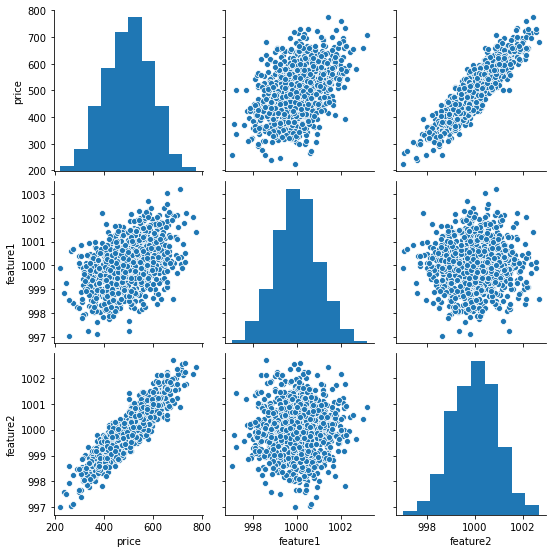

In [4]:
sns.pairplot(df)

This is a very simply dataset, but the pairplot can show us how the two features may correlate to pricing.

### Training the Model

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
#We need .values because it's best to pass in numpy arrays due to how tensorflow works
X = df[['feature1', 'feature2']].values
y = df['price'].values

In [7]:
#Split into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
#Scale data to be between 0 and 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [9]:
#Calc params needed to scale later on
#Only perform on training set as to not influence based on test data
scaler.fit(X_train)

MinMaxScaler()

In [10]:
#Perform transformation
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Create Model - Neural Network

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

#### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [12]:
#Add multiple layers into sequential with the number of neurons needed
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [13]:
#Fit
model.fit(x=X_train,y=y_train,epochs=400)

Epoch 1/400
22/22 [==============================] - 0s 636us/step - loss: 256152.3125
Epoch 2/400
22/22 [==============================] - 0s 635us/step - loss: 255916.9375
Epoch 3/400
22/22 [==============================] - 0s 553us/step - loss: 255655.4531
Epoch 4/400
22/22 [==============================] - 0s 615us/step - loss: 255363.8125
Epoch 5/400
22/22 [==============================] - 0s 543us/step - loss: 255037.2500
Epoch 6/400
22/22 [==============================] - 0s 497us/step - loss: 254667.4062
Epoch 7/400
22/22 [==============================] - 0s 452us/step - loss: 254246.0781
Epoch 8/400
22/22 [==============================] - 0s 500us/step - loss: 253698.9062
Epoch 9/400
22/22 [==============================] - 0s 544us/step - loss: 252947.6406
Epoch 10/400
22/22 [==============================] - 0s 543us/step - loss: 252069.0469
Epoch 11/400
22/22 [==============================] - 0s 499us/step - loss: 251070.8594
Epoch 12/400
22/22 [=====================

22/22 [==============================] - 0s 589us/step - loss: 1635.9502
Epoch 95/400
22/22 [==============================] - 0s 544us/step - loss: 1631.9891
Epoch 96/400
22/22 [==============================] - 0s 635us/step - loss: 1628.3645
Epoch 97/400
22/22 [==============================] - 0s 635us/step - loss: 1624.1587
Epoch 98/400
22/22 [==============================] - 0s 544us/step - loss: 1620.2744
Epoch 99/400
22/22 [==============================] - 0s 589us/step - loss: 1616.2141
Epoch 100/400
22/22 [==============================] - 0s 589us/step - loss: 1612.2307
Epoch 101/400
22/22 [==============================] - 0s 589us/step - loss: 1608.1316
Epoch 102/400
22/22 [==============================] - 0s 589us/step - loss: 1604.0463
Epoch 103/400
22/22 [==============================] - 0s 635us/step - loss: 1599.8966
Epoch 104/400
22/22 [==============================] - 0s 544us/step - loss: 1595.7601
Epoch 105/400
22/22 [==============================] - 0s 589u

22/22 [==============================] - 0s 499us/step - loss: 1098.3253
Epoch 189/400
22/22 [==============================] - 0s 544us/step - loss: 1092.2635
Epoch 190/400
22/22 [==============================] - 0s 453us/step - loss: 1083.5614
Epoch 191/400
22/22 [==============================] - 0s 499us/step - loss: 1076.1442
Epoch 192/400
22/22 [==============================] - 0s 462us/step - loss: 1068.5443
Epoch 193/400
22/22 [==============================] - 0s 499us/step - loss: 1060.9596
Epoch 194/400
22/22 [==============================] - 0s 497us/step - loss: 1053.1733
Epoch 195/400
22/22 [==============================] - 0s 453us/step - loss: 1045.3864
Epoch 196/400
22/22 [==============================] - 0s 453us/step - loss: 1037.9081
Epoch 197/400
22/22 [==============================] - 0s 499us/step - loss: 1030.4675
Epoch 198/400
22/22 [==============================] - 0s 529us/step - loss: 1022.4775
Epoch 199/400
22/22 [==============================] - 0s

22/22 [==============================] - 0s 466us/step - loss: 360.6161
Epoch 284/400
22/22 [==============================] - 0s 543us/step - loss: 355.2021
Epoch 285/400
22/22 [==============================] - 0s 542us/step - loss: 348.6162
Epoch 286/400
22/22 [==============================] - 0s 453us/step - loss: 341.0709
Epoch 287/400
22/22 [==============================] - 0s 500us/step - loss: 335.2822
Epoch 288/400
22/22 [==============================] - 0s 489us/step - loss: 329.6495
Epoch 289/400
22/22 [==============================] - 0s 453us/step - loss: 322.0253
Epoch 290/400
22/22 [==============================] - 0s 499us/step - loss: 315.7760
Epoch 291/400
22/22 [==============================] - 0s 494us/step - loss: 309.8737
Epoch 292/400
22/22 [==============================] - 0s 499us/step - loss: 303.8856
Epoch 293/400
22/22 [==============================] - 0s 452us/step - loss: 298.7893
Epoch 294/400
22/22 [==============================] - 0s 497us/step

22/22 [==============================] - 0s 475us/step - loss: 36.2909
Epoch 379/400
22/22 [==============================] - 0s 544us/step - loss: 35.6077
Epoch 380/400
22/22 [==============================] - 0s 516us/step - loss: 35.1517
Epoch 381/400
22/22 [==============================] - 0s 499us/step - loss: 34.3432
Epoch 382/400
22/22 [==============================] - 0s 499us/step - loss: 33.8484
Epoch 383/400
22/22 [==============================] - 0s 453us/step - loss: 33.3615
Epoch 384/400
22/22 [==============================] - 0s 519us/step - loss: 32.6519
Epoch 385/400
22/22 [==============================] - 0s 499us/step - loss: 32.2640
Epoch 386/400
22/22 [==============================] - 0s 453us/step - loss: 31.8481
Epoch 387/400
22/22 [==============================] - 0s 499us/step - loss: 31.2026
Epoch 388/400
22/22 [==============================] - 0s 453us/step - loss: 30.7392
Epoch 389/400
22/22 [==============================] - 0s 464us/step - loss: 30

In [14]:
#Grab losses and stick into a dataframe
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

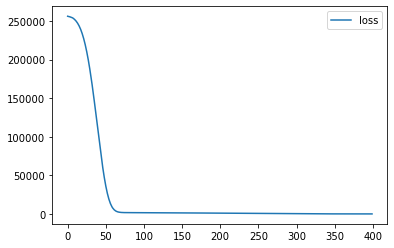

In [15]:
#Plot out of the losses
#I.E. show how the model continually improves until no more improvement is possible
loss_df.plot()

### Model Evaluation

There are several ways to evaluate how this model performs

#### Evaluate MSE

In [16]:
#Evaluate MSE for test vs training set
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [17]:
training_score

26.82504653930664

In [18]:
test_score

28.019241333007812

#### Run Predictions against test set

In [19]:
test_predictions = model.predict(X_test)

In [20]:
test_predictions

array([[407.5595 ],
       [622.1908 ],
       [591.06555],
       [572.2715 ],
       [370.56708],
       [578.721  ],
       [516.5132 ],
       [460.0772 ],
       [549.65283],
       [448.59915],
       [610.60626],
       [547.8039 ],
       [421.2196 ],
       [411.32306],
       [648.3508 ],
       [438.74588],
       [508.15173],
       [658.86804],
       [660.9687 ],
       [564.73676],
       [338.20972],
       [446.51242],
       [385.5675 ],
       [381.41846],
       [566.2637 ],
       [610.0028 ],
       [532.7079 ],
       [429.65808],
       [654.1821 ],
       [415.79855],
       [443.88672],
       [486.07037],
       [440.05743],
       [680.00476],
       [426.0268 ],
       [420.19025],
       [501.48483],
       [550.2528 ],
       [511.073  ],
       [398.77924],
       [617.0963 ],
       [418.40723],
       [603.22736],
       [446.81992],
       [502.67554],
       [579.92993],
       [666.064  ],
       [490.85712],
       [321.81537],
       [486.46796],


In [21]:
#Put in a series 
test_predictions = pd.Series(test_predictions.reshape(300,))

In [22]:
#Concatenate into one dataframe
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])
pred_df = pd.concat([pred_df,test_predictions], axis=1)

pred_df.columns = ['Test True Y', 'Model Predictions']

<AxesSubplot:xlabel='Test True Y', ylabel='Model Predictions'>

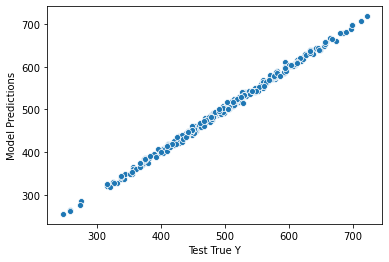

In [23]:
#Compare Correlation of Test/Train
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

#### Revisit MSE along with Other Metrics

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
#MAS
#I.E. On average, how many dollars off are we?
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

4.309533628692207

In [26]:
#MSE
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])

28.019247775153865

In [27]:
#RMSE
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])**0.5

5.293321053474261

### Run predictions on new data

Let's pretend we want to add a gem, without a price, to the model and predict a price.

We'll create a new gem with two features

In [28]:
new_gem = [[998,1000]]

In [29]:
#Remember to scale the data
new_gem = scaler.transform(new_gem)

In [30]:
model.predict(new_gem)

array([[422.68384]], dtype=float32)

So, here we're predicting the price of the new gem will be approx. $423 dollars with those two features listed.

### Save the model for future use

In [31]:
from tensorflow.keras.models import load_model

In [32]:
model.save('my_gem_model.h5')

In [33]:
later_model = load_model('my_gem_model.h5')